In [3]:
import pandas as pd
import numpy as np
import urllib
import requests
import re
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
#from googlesearch import search
from urllib.error import HTTPError
import socket

In [4]:
import sys
sys.path.insert(1, 'C:/Users/Woon/Desktop/Columbia/Applied Analytics/Term3/Sentiment_SNP')

import helper_functions
from helper_functions import *

In [5]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


In [6]:
url = "https://finviz.com/news.ashx"


headers = {"User-Agent": "Mozilla/5.0"}
cookies = {"CONSENT": "YES+cb.20210720-07-p0.en+FX+410"}

req = Request(url, headers=headers)
#requests.get(url, headers=headers,verify=False)

try:
    #urllib.request.urlretrieve(url)
    contents = urlopen(req).read() 
    #contents = urlopen(url).read()
    soup = BeautifulSoup(contents, features="html.parser")

    sentence2 = []

    for tag in soup.find_all('a'):

        sentence = tag.text.split(".")
        sentence2.append(sentence)
        #search_keywords=['patient access','patient reached','patients reached','patients treated','reimbursement','reimbursed','coverage', 'access performance', 'access rate', 'covered']

        # for sentence in sentences:
        #     for word in search_keywords:
        #         if word in sentence:
        #             url2.append(url)
        #             word2.append(word)
        #             sentence2.append(sentence)

        #print(sentence)


except urllib.error.HTTPError as err:
    print(err.code)

except socket.timeout as se:
    print("socket timeout")


# df = pd.DataFrame({'url': url2, 'keyword': word2, 'context':sentence2})
# df.to_csv('johnson.csv', index=False, encoding='utf-8')

In [7]:
from transformers import pipeline

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

c:\Users\Woon\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [ ]:
df = pd.DataFrame(sentence2)

In [ ]:
df['Headline'] = df[0]
df['Sentiment'] = -2
df = pd.DataFrame(list(zip(df['Headline'], df['Sentiment'])), columns=['Headline', 'Sentiment'])
df

,Headline,Sentiment
0,,-2
1,Home,-2
2,News,-2
3,Screener,-2
4,Maps,-2
...,...,...
200,privacy,-2
201,help,-2
202,Do Not Sell My Data,-2
203,Privacy Settings,-2


In [ ]:
i = []

for string in df['Headline']:
    i.append(count_words(string))

df['word_count'] = i


In [ ]:
sentiment = [None] * len(df)
sentiment_score = [None] * len(df)
index = -1
for sentence in df['Headline']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment[index] = result['label']
    sentiment_score[index] = result['score']
df['Sentiment'] = sentiment
df['Score'] = sentiment_score


0
20
40
60
80
100
120
140
160
180
200


In [ ]:
import seaborn as sns

In [ ]:
df2 = df[df['Sentiment'] == 'POSITIVE']

<AxesSubplot: xlabel='Sentiment', ylabel='Count'>

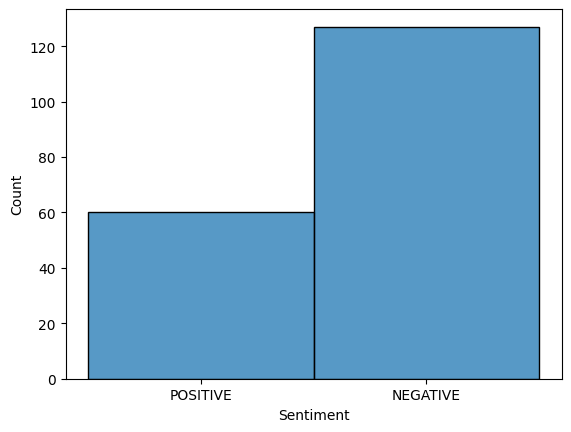

In [ ]:
sns.histplot(x = 'Sentiment', data = df[df['Score'] > 0.8])